# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2023

## Homework 4
Due Wednesday, February 15

### Problem 1

(from **Insight**, P6.1.10)

Write a program that generates $n=10$ real numbers selected randomly and
uniformly distributed from the set
$\{x : 0 < x < 2\text{ or }7 < x < 10\}$.

In [1]:
using Random

n = 10
s = [range(1e-12, stop=2-1e-12, length=10000000); range(7+1e-12, stop=10-1e-12, length=10000000)]
rando = rand(s, n)

10-element Vector{Float64}:
 9.743800274379199
 0.19371841937264822
 1.9036479903638952
 1.967671996766232
 0.17779681778050396
 1.729339572933228
 0.6741888674192126
 0.5711996571203944
 7.15353041535394
 1.3781085378104756

### Problem 2

(from **Insight**, P6.1.12)

Assume that the coefficients of the quadratic $a x^2 + bx + c$ are selected from the uniform
distribution on $(−2, 2)$. Use the Monte Carlo method to determine the probability of complex roots. What if the coefficients are generated with `randn` with mean $\mu=0$ and standard deviation $\sigma = 0.4$?

In [2]:
using Random
using PyPlot

ntrials = 1e5
out = Float64[]
sum_r = 0
sum_m = 0
μ = 0
σ = 0.4
for i = 1:ntrials
    r = -2 .+ rand(3) .* 4
    r_n = [σ*randn() + μ; σ*randn() + μ; σ*randn() + μ]
    determinant_1 = r[2]^2 - 4*r[1]*r[3]
    determinant_2 = r_n[2]^2 - 4*r_n[1]*r_n[3]
    if determinant_1 < 0
        sum_r += 1
    end
    if determinant_2 < 0
        sum_m += 1
    end
end

average_r = sum_r / ntrials
average_m = sum_m / ntrials
println("Probability of complex roots from uniformly distributed random numbers on interval (-2,2):\n", average_r,"\n")
println("Probability of complex roots from normal distribution with a mean μ=0 and σ=0.4:\n", average_m)

Probability of complex roots from uniformly distributed random numbers on interval (-2,2):
0.37016

Probability of complex roots from normal distribution with a mean μ=0 and σ=0.4:
0.35095


### Problem 3

(from **Insight**, P6.1.15)

Two points on the unit circle are randomly selected. Use the Monte Carlo method to determine the probability that the length of the connecting chord is greater than 1.

In [3]:
ntrials = 1e5
sum = 0
for i = 1:ntrials
    u_r = (2rand(2) .- 1, 2rand(2) .- 1)
    x_1 = u_r[1][1]
    x_2 = u_r[2][1]
    y_1 = u_r[1][2]
    y_2 = u_r[2][2]
    chord = sqrt((x_2-x_1)^2 + (y_2-y_1)^2)
    if chord > 1
        sum += 1
    end
end
average = sum / ntrials
println("Probability that two randomly selecting points on the unit circle have a chord length greater than 1:\n", average)

Probability that two randomly selecting points on the unit circle have a chord length greater than 1:
0.51574


### Problem 4

(from **Insight**, P6.1.19a)

Write a function `ProbG(L,R)` that returns an estimate of the area under the function

$$
f(x) =  \frac{1}{\sqrt{2\pi}} e^{-x^2/2}
$$

from $L$ to $R$ using Monte Carlo. Assume $L < R$. *Hint*: Throw darts in the rectangle having
vertices $(L, 0)$, $(R, 0)$, $(R, 1)$, and $(L, 1)$ and count how many are under the curve.

In [4]:
function ProbG(L, R)
    n = 100000
    x = L .+ (R - L) .* rand(n)
    y = rand(n)
    hits = 0
    for i=1:n
        f_x = ((1/sqrt(2*pi)) * ((ℯ)^(-(x[i]^2.0)/2)))
        if f_x > y[i] 
            hits += 1
        end
    end
    approx = hits/n
    return 2approx
end

ProbG (generic function with 1 method)

Test the function using $L=0$ and $R=2$:

In [5]:
ProbG(0, 2)

0.47508

### Problem 5

(from **Insight**, P6.2.5)

Consider the random walk function `random_walk(n)` from the lecture slides.

We conjecture that the walker is more likely to exit near the middle of an edge than near a
corner. Produce a bar plot that sheds light on this conjecture, for `n=20` and a large number of trials. 

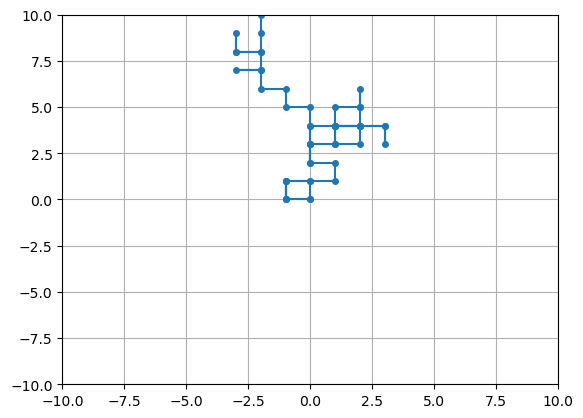

In [6]:
using PyPlot
function random_walk(n)
    x = [0]
    y = [0]
    while abs(x[end]) < n && abs(y[end]) < n
        if rand() < 0.5
            if rand() < 0.5  # Up
                push!(x, x[end])
                push!(y, y[end] + 1)
            else             # Down
                push!(x, x[end])
                push!(y, y[end] - 1)
            end
        else
            if rand() < 0.5  # Right
                push!(x, x[end] + 1)
                push!(y, y[end])
            else             # Left    
                push!(x, x[end] - 1)
                push!(y, y[end])
            end
        end
    end
    x,y
end

n = 10
x,y = random_walk(n)

plot(x, y, marker=".", markersize=8)     # Draw dots at each point in x,y
grid(true)
axis([-n,n,-n,n]);

### Problem 6

Use Monte Carlo simulation with one million trials to estimate the probability that a random poker hand contains two pairs (that is, two of each of two different ranks and a fifth card of a third rank).

In [7]:
n=1e6
cards = 1:52
card_sorted = [(@. (cards-1) % 13 + 1) (@. (cards-1) ÷ 13 + 1)]
deuce = 0
for i=1:n
    hand = randperm(52)
    hand = hand[1:5]
    hand = [(@. (hand-1) % 13 + 1) (@. (hand-1) ÷ 13 + 1)]
    counter = 0
    doubles = []
    for j=1:13
        if count(x->x==j, hand) == 2 && !(any(x->x==j, doubles))
            counter += 1
        end
    end 
    if counter == 2
        deuce += 1
    end
end
p = deuce / n
println("Probability of a hand containing two pair: ", p)

Probability of a hand containing two pair: 0.300273


### Problem 7

Use array functions and vectorization to solve the problems below using *only a single line of code* for each problem.

In [30]:
A = reshape((-22:22) .% 11, 9, 5)          # For testing

9×5 Matrix{Int64}:
   0   -2  -4   5   3
 -10   -1  -3   6   4
  -9    0  -2   7   5
  -8  -10  -1   8   6
  -7   -9   0   9   7
  -6   -8   1  10   8
  -5   -7   2   0   9
  -4   -6   3   1  10
  -3   -5   4   2   0

### Problem 7(a)

Count the number of elements $a$ of $A$ that satisfy $a^2<10$.

In [13]:
elm = length([a for a in A if a^2 < 10])

17

### Problem 7(b)

Create a matrix which contains only the columns $j$ of $A$ where the first element $A_{1,j} \ge 0$.

In [20]:
m = [A[:, j] for j in 1:size(A,2) if A[1, j] ≥ 0]

3-element Vector{Vector{Int64}}:
 [0, -10, -9, -8, -7, -6, -5, -4, -3]
 [5, 6, 7, 8, 9, 10, 0, 1, 2]
 [3, 4, 5, 6, 7, 8, 9, 10, 0]

### Problem 7(c)

Modify $A$ in the following way: Multiply all the elements that are even by 3 (you might need to print $A$ on a separate line to see the full matrix):

In [31]:
A = [A[i,j] % 2 == 0 ? A[i,j] * 3 : A[i,j] for i in 1:size(A,1), j in 1:size(A,2)]

9×5 Matrix{Int64}:
   0   -6  -12   5   3
 -30   -1   -3  18  12
  -9    0   -6   7   5
 -24  -30   -1  24  18
  -7   -9    0   9   7
 -18  -24    1  30  24
  -5   -7    6   0   9
 -12  -18    3   1  30
  -3   -5   12   6   0